## Recurrent Neural Network

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder

sns.set()

In [122]:
# load mnist of handwritten digits data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:5000,:,:]/255
y_train = y_train[:5000]

x_test  = x_test/255



In [143]:
# change dimension of X
X_train = np.transpose(x_train,(1,2,0))
X_test  = np.transpose(x_test,(1,2,0))

# one hot for Y
Y_train = np.reshape(y_train,(-1,1))
Y_test  = np.reshape(y_test,(-1,1))
enc = OneHotEncoder(categories='auto',sparse=False)
enc.fit(Y_train)
Y_train = np.transpose(enc.transform(Y_train))
Y_test = np.transpose(enc.transform(Y_test))

In [124]:
n_x = 28
T_x = 28
n_a = 50
n_y = 10

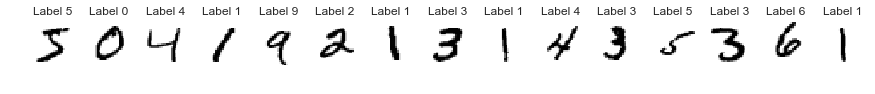

In [125]:
example_num = 15
plt.figure(figsize=(example_num,1))

for i in range(example_num):
    plt.subplot(1,example_num,i+1)
    plt.imshow(X_train[:,:,i],cmap=plt.cm.gray_r)
    plt.title('Label {}'.format(np.argmax(Y_train[:,i])))
    plt.grid(False)
    plt.axis('off')
plt.show()

In [144]:
tf.reset_default_graph()

batchX = tf.placeholder(dtype=tf.float32,shape=(n_x,T_x,None),name='X')
batchY = tf.placeholder(dtype=tf.float32,shape=(n_y,None),name='Y')


Wax = tf.get_variable('Wax',shape=(n_a,n_x),dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())
Waa = tf.get_variable('Waa',shape=(n_a,n_a),dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())
ba = tf.get_variable('ba',shape=(n_a,1),dtype=tf.float32,initializer=tf.zeros_initializer())
    
Wya = tf.get_variable('Wya',shape=(n_y,n_a),dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())
by = tf.get_variable('by',shape=(n_y,1),dtype=tf.float32,initializer=tf.zeros_initializer())

batchX_seq = tf.unstack(batchX,num=T_x,axis=1)

prev_state = tf.zeros((n_a,1))
for t in range(T_x):
    current_state = tf.tanh(tf.matmul(Wax,batchX_seq[t]) + tf.matmul(Waa,prev_state) + ba)
    prev_state = current_state

logits = tf.transpose(tf.matmul(Wya,current_state) + by)
labels = tf.transpose(batchY)
    
batchY_pred = tf.transpose(tf.nn.softmax(logits))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels,logits=logits))

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
accr = 100*tf.reduce_mean(tf.cast(tf.equal(tf.argmax(batchY_pred,0), tf.argmax(batchY,0)), tf.float32))

iteration_num = 200
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for i in range(iteration_num):
        _,cost_val = sess.run([optimizer,cost],
                                  feed_dict={batchX:X_train,batchY:Y_train})
        
        train_accr = sess.run(accr,feed_dict={batchX:X_train,batchY:Y_train})
        test_accr = sess.run(accr,feed_dict={batchX:X_test,batchY:Y_test})
        if i%10 == 0:
            print("cost after %d iterations = %.4f, train accuracy = %.1f, test accuracy = %.1f" % (i,cost_val,train_accr,test_accr))
    

cost after 0 iterations = 2.3593, train accuracy = 10.4, test accuracy = 10.8
cost after 10 iterations = 2.1088, train accuracy = 30.5, test accuracy = 29.5
cost after 20 iterations = 1.8949, train accuracy = 39.9, test accuracy = 39.0
cost after 30 iterations = 1.7105, train accuracy = 46.9, test accuracy = 45.1
cost after 40 iterations = 1.5442, train accuracy = 51.5, test accuracy = 49.6
cost after 50 iterations = 1.3993, train accuracy = 56.4, test accuracy = 54.3
cost after 60 iterations = 1.2868, train accuracy = 59.2, test accuracy = 57.3
cost after 70 iterations = 1.1890, train accuracy = 62.9, test accuracy = 61.3
cost after 80 iterations = 1.0915, train accuracy = 67.0, test accuracy = 64.3
cost after 90 iterations = 0.9951, train accuracy = 69.9, test accuracy = 66.8
cost after 100 iterations = 0.9063, train accuracy = 72.6, test accuracy = 69.3
cost after 110 iterations = 0.8233, train accuracy = 75.8, test accuracy = 72.8
cost after 120 iterations = 0.7459, train accuracy 